In [20]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2,ResNet50,EfficientNetB0,DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
# Update this to match your path
train_data_dir = "/content/drive/MyDrive/Images"

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 15


In [37]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 439 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


In [38]:
# STEP 1: Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Fit the generator
datagen.fit(X_train)

In [39]:
base_model = DenseNet121(input_shape=(128, 128, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze base


# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4710 - loss: 1.0094

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.4723 - loss: 1.0068 - val_accuracy: 0.5556 - val_loss: 0.8202
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5354 - loss: 0.8583 - val_accuracy: 0.6389 - val_loss: 0.7026
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6124 - loss: 0.7240 - val_accuracy: 0.6667 - val_loss: 0.6284
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5885 - loss: 0.7410 - val_accuracy: 0.6759 - val_loss: 0.5785
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.6532 - loss: 0.6660 - val_accuracy: 0.6944 - val_loss: 0.5523
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6584 - loss: 0.6640 - val_accuracy: 0.7130 - val_loss: 0.5270
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.6597 - loss: 0.6491 - val_accuracy: 0.7315 - val_loss: 0.5186
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6149 - loss: 0.6610 - val_accuracy: 0.7407 - val_loss: 0.5102
Epo

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8463 - loss: 0.4414
Validation Accuracy: 82.41%


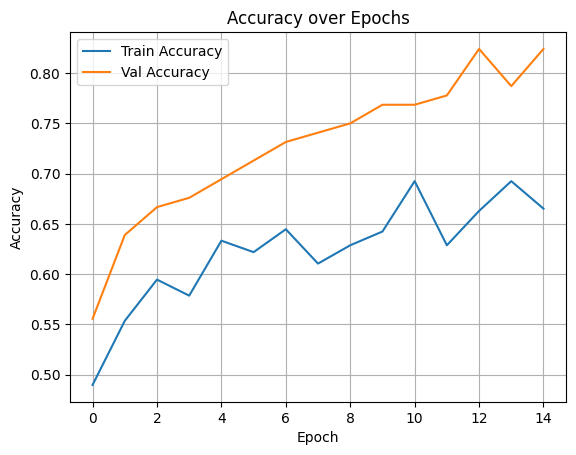

In [41]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()